# Random Forest

## 1. Dataset

In [1]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
Y = data.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9)

## 2. Modelo

In [2]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)

In [4]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [5]:
rfc.score(X_train, Y_train)

1.0

In [6]:
rfc.score(X_test, Y_test)

1.0

In [8]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1436263419),
 DecisionTreeClassifier(max_features='auto', random_state=1438872800),
 DecisionTreeClassifier(max_features='auto', random_state=816606791),
 DecisionTreeClassifier(max_features='auto', random_state=529083069),
 DecisionTreeClassifier(max_features='auto', random_state=1592052063),
 DecisionTreeClassifier(max_features='auto', random_state=15860727),
 DecisionTreeClassifier(max_features='auto', random_state=455277136),
 DecisionTreeClassifier(max_features='auto', random_state=760856507),
 DecisionTreeClassifier(max_features='auto', random_state=567436114),
 DecisionTreeClassifier(max_features='auto', random_state=1887468193)]

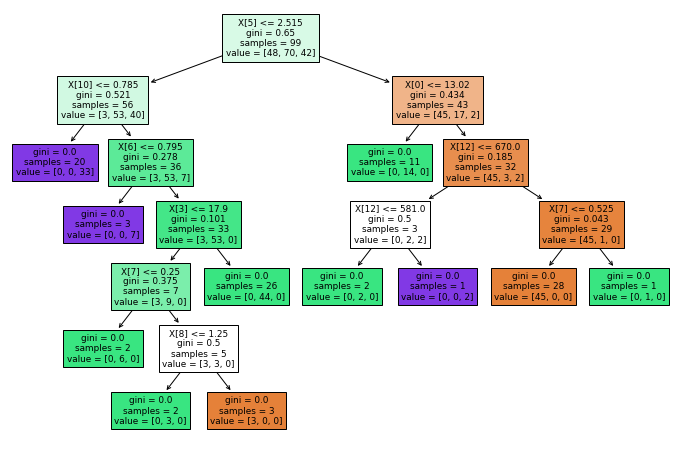

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(rfc.estimators_[5],filled=True)
plt.show()

Comparacion con un DTC

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [11]:
dtc.score(X_test,Y_test)

0.8888888888888888

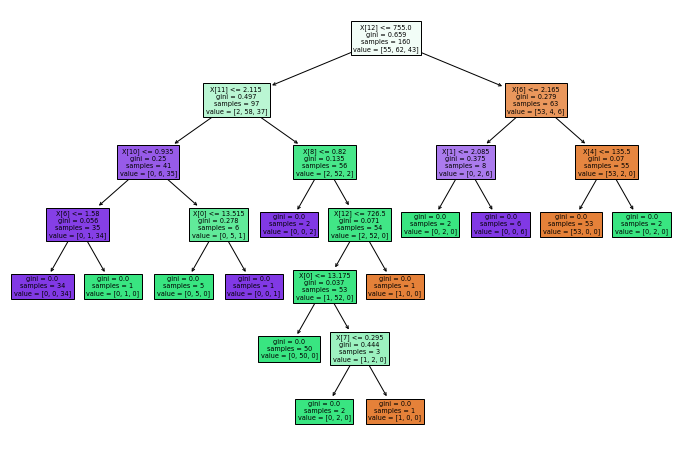

In [13]:
plt.figure(figsize=(12,8))
plot_tree(dtc,filled=True)
plt.show()

Evaluacion con validacion cruzada

In [15]:
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(rfc,X,Y, cv=5)
score_rfc

array([0.86111111, 0.91666667, 0.86111111, 1.        , 0.97142857])

In [17]:
score_dtc = cross_val_score(dtc,X,Y, cv=5)
score_dtc

array([0.94444444, 0.77777778, 0.97222222, 0.91428571, 0.85714286])

Evolucion del modelo con mas estimadores

In [19]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype(data_home='./')

In [21]:
X = data.data
Y = data.target

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
accuracy1 = list()
accuracy2 = list()
for i in range(1,100):
  a1 = cross_val_score(RandomForestClassifier(i),X,Y,cv=10, scoring='accuracy')
  a1 = a1.mean()
  accuracy1.append(a1)
  a2 = cross_val_score(ExtraTreesClassifier(i),X,Y,cv=10, scoring='accuracy')
  a2 = a2.mean()
  accuracy2.append(a2)
plt.plot(accuracy1, label='RFC')
plt.plot(accuracy2, label='ETC')
plt.legend()
plt.show()